In [4]:
import pandas as pd

# Loading the dataset
file_path = r'C:\Users\divya\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Dropping rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Creating TenureCategory column
def tenure_category(tenure):
    if tenure <= 12:
        return '0–1 year'
    elif tenure <= 24:
        return '1–2 years'
    elif tenure <= 48:
        return '2–4 years'
    else:
        return '4+ years'

df['TenureCategory'] = df['tenure'].apply(tenure_category)

# Creating ChurnBinary column
df['ChurnBinary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Saving the cleaned file
output_path = r'C:\Users\divya\Downloads\cleaned_telco_churn.csv'
df.to_csv(output_path, index=False)

print("✅ Cleaned dataset saved successfully at:")
print(output_path)

# shows a preview
df.head()


✅ Cleaned dataset saved successfully at:
C:\Users\divya\Downloads\cleaned_telco_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCategory,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–1 year,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2–4 years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–1 year,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2–4 years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–1 year,1


Overall Churn Rate: 26.58%


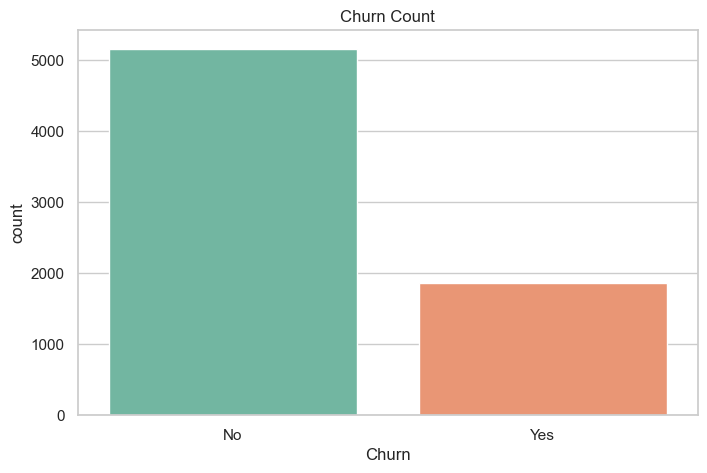

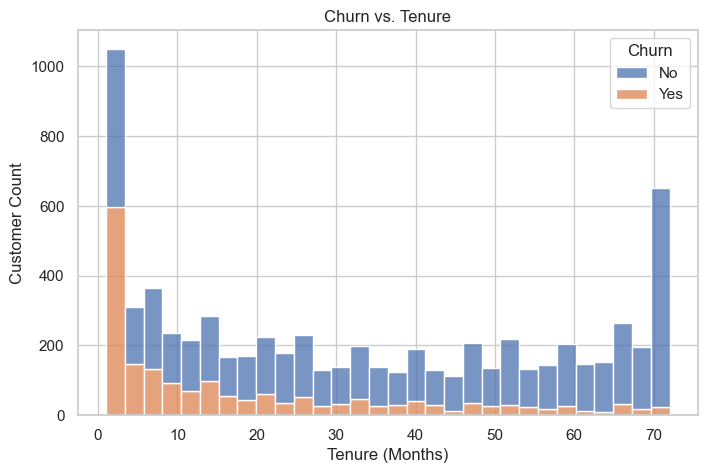

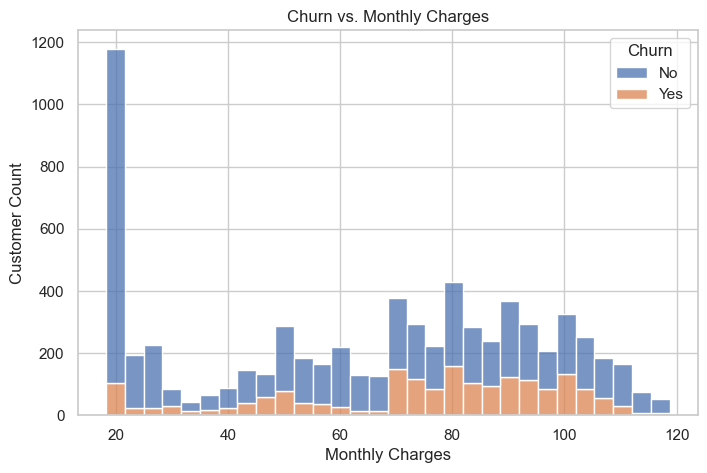

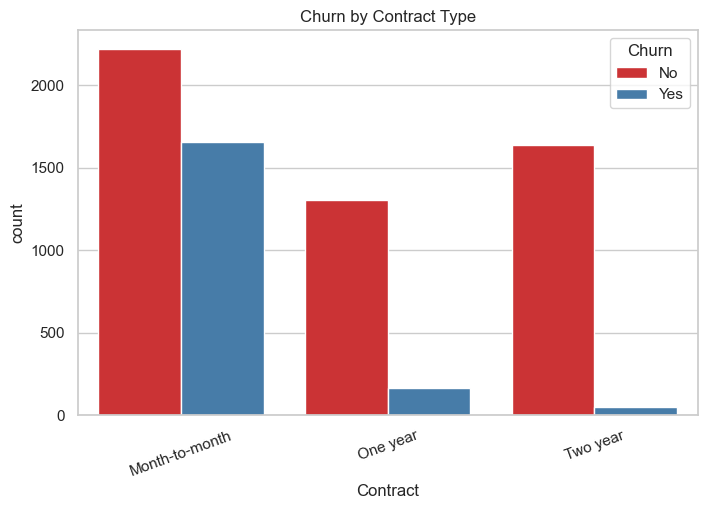

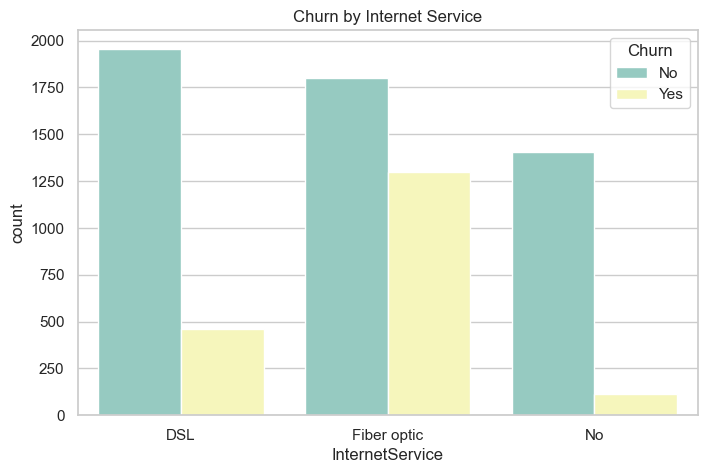

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settingup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Loading cleaned data
df = pd.read_csv(r'C:\Users\divya\Downloads\cleaned_telco_churn.csv')

# 1. Overall Churn Rate
churn_rate = df['ChurnBinary'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Churn Count')
plt.show()

# 2. Churn vs. Tenure
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False, multiple="stack")
plt.title('Churn vs. Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.show()

# 3. Churn vs. MonthlyCharges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=False, multiple="stack")
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Customer Count')
plt.show()

# 4. Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')
plt.xticks(rotation=20)
plt.show()

# 5. Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Internet Service')
plt.show()
